### Exception Handling

- Exceptions occur due to circumstances beyond programmer's control
    - E.g., when invalid data are input or file cannot be accessed
- Even though the user is at fault
    - Programmer must anticipate exceptions
    - Include code to work around the occurence

자신이 생각하는 경우에만 한정하는 것이 아니라 생각지 못한 일이 발생해 에러가 발생하는 경우를 대비해 프로그램을 작성해야 한다.

In [1]:
numDependents = int(input("Enter number of dependents: "))
taxCredit = 1000 * numDependents
print("Tax credit:", taxCredit)

Enter number of dependents: Two


ValueError: invalid literal for int() with base 10: 'Two'

숫자가 아닌 문자를 입력해서 Error가 발생한 상황이다.

- Some common exceptions:
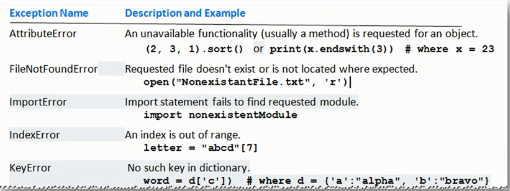

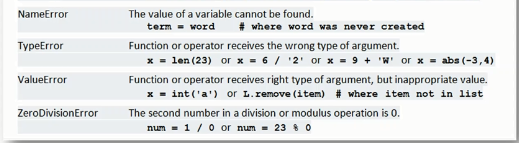
- len() operator를 쓸 때 sequence를 입력해야지 숫자를 입력하면 Error가 뜬다.

### The _try_ Statement
- The previous exception can be handled more robustly by protectiong the code with a __try__ statement

In [4]:
try:
    numDependents = int(input("Enter number of dependents: "))
except ValueError:
    print('\nYou did not respond with an integer value.')
    print("We will assume your answer is zero")
    numDependents = 0
taxCredit = 1000 * numDependents
print("Tax credit:", taxCredit)

Enter number of dependents: Two

You did not respond with an integer value.
We will assume your answer is zero
Tax credit: 0


- Three types of except clauses:
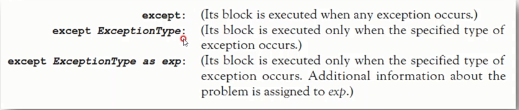

- Program with different assumptions on exceptions:

In [5]:
## except ExceptionType as exp의 예제.

def main():
    ## Display the reciprocal of a number in a file.
    try:
        fileName = input("Enter the name of a file: ")
        infile = open(fileName, 'r')
        num = float(infile.readline())
        print(1 / num)
    except FileNotFoundError as exc1:
        print(exc1)
    except TypeError as exc2:
        print(exc2)
        
main()

Enter the name of a file: ds
[Errno 2] No such file or directory: 'ds'


__except ExceptionType as exp__ 는 ExceptionType에 따라 출력되는 메세지를 exp에 할당해 변수로 만들어주는 명령어다.

- Program that uses exception handling to gurantee a proper response from the user:

In [6]:
def main():
    ## Request that the user enter a proper response.
    phoneticAlpha = {'a':"alpha", 'b':"bravo", 'c':"charlie"}
    while True:
        try:
            letter = input("Enter a, b, or c: ")
            print(phoneticAlpha[letter])
            break
        except KeyError:
            print("Unacceptable letter was entered.")
main()

Enter a, b, or c: d
Unacceptable letter was entered.
Enter a, b, or c: s
Unacceptable letter was entered.
Enter a, b, or c: b
bravo


### The _else_ and _finally_ Statement
- The following program uses exception handling to cope with the possibilities that the file is not found, the file contains a line that is not a number, or the file is empty

In [7]:
def main():
    ## Calculate the average and total of the numbers in a file.
    total = 0
    count = 0
    foundFlag = True
    try:
        infile = open("Numbers.txt", 'r')
    except FileNotError:
        print("File not found.")
        foundFlag = False
    if foundFalg:
        try:
            for line in infile:
                count += 1
                total += float(line)
            print("average:", total / count)
        except ValueError:
            print("Line", count, "could not be converted to a float")
            if count > 1:  # 한 번이라도 숫자가 입력됐으면 그것으로 평균과 총합을 구하는 것.
                print("Average so far:", total / (count - 1))
                print("Total so far:", total)
            else:   # 한 번도 숫자가 입력이 안 된 것.
                print("No average can be calculated.")
        except ZeroDivisionError:
            print("File was empty.")
        else:   # else문은 무슨 의미? 위의 Error들(except clauses)이 발생하지 않으면 실행한다는 구문.
            print("Total:", total)
        finally:
            infile.close()

- __try__ statement can also include a single __else__ clause
    - Follows the except clauses
    - Executed when no exceptions occur
- __try__ statement can end with a __finally__ clause
    - Usually used to clean up resources such as files that were left open
- __try__ statement must contain either an __except__ clause or a __finally__ clause